# pymofa tutorial
last updated: 2016-09-06

This notebook introduces the basic functionalities of pymofa, the python modeling framework to run and evaluate your models systematically ;)

In [1]:
# if you work with this notebook interactively, exectue

In [2]:
# cd ..

/home/barfuss/ZimBox/Software/pymofa


In [3]:
# to be at the pymofa root

In [4]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt

## A discrete predetor prey dummy model
First we need to create a dummy model. Let's use a discrete version of the famous predator prey model.


In [5]:
def predprey_model(prey_birth_rate, prey_mortality, 
                   predator_efficiency, predator_death_rate,
                   initial_prey, initial_predators,
                   time_length):
    """Discrete predetor prey model."""
    A = -1 * np.ones(time_length)
    B = -1 * np.ones(time_length)
    A[0] = initial_prey
    B[0] = initial_predators
    for t in xrange(1, time_length):
        A[t] = A[t-1] + prey_birth_rate * A[t-1] - prey_mortality * B[t-1]*A[t-1]
        B[t] = B[t-1] + predator_efficiency * B[t-1]*A[t-1] - predator_death_rate * B[t-1] +\
            0.02 * (0.5 - np.random.rand())
    return A, B

**Example usage**:

In [6]:
preys, predators = predprey_model(0.1, 0.1, 0.1, 0.01, 1.0, 1.0, 1000)

<IPython.core.display.Javascript object>


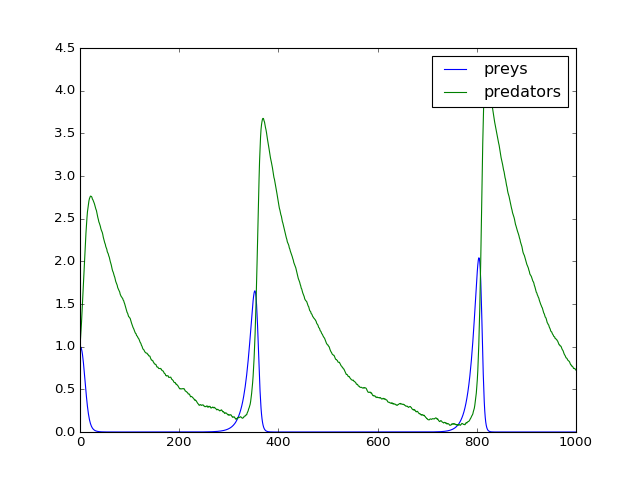

In [7]:
plt.plot(preys, label="preys") 
plt.plot(predators, label="predators")
plt.legend()

## Applying pymofa

In [8]:
# imports
from pymofa.experiment_handling import experiment_handling as eh
import itertools as it
import pandas as pd
# import cPickle

In [9]:
# Path where to Store the simulated Data
SAVE_PATH_RAW = "./dummy/pymofatutorial"

In [10]:
# Definingh the experiment execution function
#      it gets paramater you want to investigate, plus `filename` as the last parameter
def RUN_FUNC(prey_birth_rate, coupling, predator_death_rate, initial_pop, time_length,
             filename):
    """Insightful docstring."""
    # poss. process
    prey_mortality = coupling
    predator_efficiency = coupling
    initial_prey = initial_pop
    initial_predators = initial_pop
    # one could also do more complicated stuff here, e.g. drawing something from a random distribution
    
    # running the model
    preys, predators = predprey_model(prey_birth_rate, prey_mortality, predator_efficiency,
                                      predator_death_rate, initial_prey, initial_predators,
                                      time_length)
    
    # preparing the data
    res = pd.DataFrame({"preys": np.array(preys),
                        "predators": np.array(predators)})
    
    # Save Result
    res.to_pickle(filename)
    
    # determine exit status (if something went wrong)
    # if exit status > 0 == run passen
    # if exit status < 0 == Run Failed
    exit_status = 42
    
    # RUN_FUNC needs to return exit_status
    return exit_status 

In [11]:
# Parameter combinations to investiage
prey_birth_rate = [0.09, 0.1, 0.11]
coupling = [0.1]
predator_death_rate = [0.005, 0.01, 0.05, 0.1]
initial_pop = [1.0, 2.0]
time_length = [1000]

PARAM_COMBS = list(it.product(prey_birth_rate, coupling, predator_death_rate, initial_pop, time_length))

In [12]:
# Sample Size
SAMPLE_SIZE = 5

In [13]:
# INDEX 
INDEX = {i: RUN_FUNC.func_code.co_varnames[i] for i in xrange(len(RUN_FUNC.func_code.co_varnames)-1)}

In [14]:
# initiate handle instance with experiment variables
handle = eh(SAMPLE_SIZE, PARAM_COMBS, INDEX, SAVE_PATH_RAW)

In [15]:
# Compute experiemnts raw data
handle.compute(RUN_FUNC)

120 of 120 single computations left
Only one node available. No parallel execution.
Splitting calculations to 0 nodes.
Calculating 0 ...done.


In [17]:
rm -r dummy/